In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

Load CSVs

In [3]:
study_programshs23 = pd.read_csv("/content/VVZ_HS23_study_programs.csv", encoding="utf-8")
moduleshs23 = pd.read_csv("/content/VVZ_HS23_modules.csv",encoding="utf-16")
time_schedulehs23 = pd.read_csv("/content/VVZ_HS23_time_schedule.csv")

study_programshs24 = pd.read_csv("/content/VVZ_HS24_study_programs.csv", encoding="utf-16")
moduleshs24 = pd.read_csv("/content/VVZ_HS24_modules.csv",encoding="utf-16")
time_schedulehs24 = pd.read_csv("/content/VVZ_HS24_time_schedule.csv")

study_programsfs23 = pd.read_csv("/content/VVZ_FS23_study_programs.csv", encoding="utf-8")
modulesfs23 = pd.read_csv("/content/VVZ_FS23_modules.csv",encoding="utf-16")
time_schedulefs23 = pd.read_csv("/content/VVZ_FS23_time_schedule.csv")

study_programsfs24 = pd.read_csv("/content/VVZ_FS24_study_programs.csv", encoding="utf-8")
modulesfs24 = pd.read_csv("/content/VVZ_FS24_modules.csv",encoding="utf-16")
time_schedulefs24 = pd.read_csv("/content/VVZ_FS24_time_schedule.csv")


Shows Headers

In [4]:
study_programshs24.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [5]:
study_programsfs24.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Area Arabic,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
1,Area Chinese,NaN,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
2,Area German as a foreign language,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
3,Area English,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
4,Area French,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich


In [6]:
moduleshs24.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,BIO 780 Museum Internship,MNF,BIO780,Praktikum,4,Caroline Sonja Weckerle,This module is open for students of the Mono o...,NaN,"Final report or product, graded. In English or...","1-6, Half Grades Given",Can't be repeated,1 Semester (Every Semester),not bookable,not cancelable
1,Research Seminar: Political Communication,PHF,249-700,Module,18,Thomas Zerback,Multivariate Statistik erfolgreich absolviert,NaN,Portfolio,"1-6, Half Grades Given","repeatable once, book again",2 Semesters (Begins in Spring Semester),NaN,NaN
2,Fundamental Texts in Romance Linguistics,PHF,430-003,Module,6,Johannes Kabatek,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
3,Fundamental Texts in French Linguistics,PHF,430-004,Module,3,Martin-Dietrich Glessgen,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
4,Fundamental Texts in Italian Linguistics,PHF,430-005,Module,3,Michele Loporcaro,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00


In [7]:
modulesfs24.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,CHE 323 Reaction Mechanisms and Kinetics,MNF,CHE323,Lecture with Practical Exercises,4,Jason Philip Holland,NaN,NaN,written exam after the end of the semester,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
1,CHE 325 Solid State and Materials Chemistry,MNF,CHE325,Lecture with Practical Exercises,4,Greta R. Patzke,NaN,NaN,graded exam at the end of the semester,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
2,Functional Foot Trimming in Cattle,VSF,W004,Block Course,2,Karl Nuss,Organblock Bewegungsapparat erfolgreich absolv...,NaN,Klauenkurs ohne Prüfung: 1 ECTS Credits,Pass/Fail,Can be repeated once,1 Semester (Every Spring Semester),not bookable,not cancelable
3,PHY 123 Mechanical workshop II,MNF,PHY123,Block Course,1,Andreas Schilling,PHY113 Werkstattkurs I,NaN,Aktive Mitarbeit,Pass/Fail,Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
4,MAT 183 Stochastics for Natural Sciences,MNF,MAT183,Lecture with Practical Exercises,6,Reinhard Furrer,NaN,NaN,- Übungen: 60% von den Standard-Übungen,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00


In [8]:
time_schedulehs24.head()


,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forschungsseminar Protein Engineering,BCH802,Forschungsseminar,Andreas Plückthun,English,NaN,Thursday,Morning,8.0,12.0
2,Research Seminar Protein Dynamics (Progress Re...,BCH805,Forschungsseminar,Benjamin Schuler,English,NaN,Monday,Afternoon,13.0,15.0
3,Research seminars,BCH405,Seminar,"Amedeo Caflisch, Raimund Dutzler, Martin Jinek...",English,BCH 405 Research seminars,Thursday,Afternoon,16.0,18.0
4,Blockcourse: Social science Research projects,44LM001,Block Course,Dorothea Lüddeckens,German,Social science Research projects,NaN,NaN,NaN,NaN


In [9]:
time_schedulefs24.head()

,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Virologie,.335_vr,Course,"Cornel Fraefel, Julia Lechmann, Anna Sophie Ra...",German,Virology,NaN,NaN,NaN,NaN
2,Anatomy Applied,.345_aa,Lecture with Practical Exercises,"Mariusz Pawel Kowalewski, Giuliano Mario Corte...",German,Anatomy applied,NaN,NaN,NaN,NaN
3,"Epidemiology, Biostatistics",.355_eb,Course,"Paul Torgerson, Sonja Sybille Hartnack","German, English","Epidemiology, Biostatistics",NaN,NaN,NaN,NaN
4,Communication in Challenging Situations,.365_kk,Seminar,Thomas Lutz,German,Communication,NaN,NaN,NaN,NaN


In [10]:
def merge_df(module, time_sch):
  merged_df = pd.merge(module, time_sch, left_on="Number", right_on="Event Code", how="inner")

  # View the merged dataframe
  df = merged_df[["Faculty", "Event Code", "Responsible instructor", "Instructor"]]
  return df

df_hs24 = merge_df(moduleshs24, time_schedulehs24)
df_hs23 = merge_df(moduleshs23, time_schedulehs23)

df_fs24 = merge_df(modulesfs24, time_schedulefs24)
df_fs23 = merge_df(modulesfs23, time_schedulefs23)


# merged_df_fs = pd.merge(modulesfs, time_schedulefs, left_on="Number", right_on="Event Code", how="inner")

# # View the merged dataframe
# df_fs = merged_df_fs[["Faculty", "Event Code", "Responsible instructor", "Instructor"]]
# print("For FS24:")
# print(df_fs)

In [11]:
from types import new_class
# Initialize the graph
def create_graph(new_Graph, df):


  # Add edges for responsible instructors based on Faculties and Event Codes
  for _, row in df.iterrows():
      faculty = row['Faculty']
      event_code = row['Event Code']
      responsible_instructor = row['Responsible instructor']

      # Add nodes for faculty and event code
      new_Graph.add_node(faculty, type="Faculty")
      new_Graph.add_node(event_code, type="Event Code")
      new_Graph.add_node(responsible_instructor, type="Responsible Instructor")

      # Connect faculty to responsible instructor
      new_Graph.add_edge(faculty, responsible_instructor)

      # Connect event code to responsible instructor
      new_Graph.add_edge(event_code, responsible_instructor)

      # Add edges for instructors to responsible instructor
      if isinstance(row['Instructor'], str):  # Ensure it's a string
          instructors = row['Instructor'].split(", ")
          for instructor in instructors:
              new_Graph.add_node(instructor, type="Instructor")
              new_Graph.add_edge(responsible_instructor, instructor)

  red_node_count = sum(1 for _, data in new_Graph.nodes(data=True) if data.get("type") == "Faculty")
  print(f"Number of red nodes (Faculty): {red_node_count}")
  color_map = []
  for node in new_Graph.nodes(data=True):
      node_type = node[1].get("type")
      if node_type == "Faculty":
          color_map.append("red")
      elif node_type == "Event Code":
          color_map.append("deeppink")
      elif node_type == "Responsible Instructor":
          color_map.append("dodgerblue")
      elif node_type == "Instructor":
          color_map.append("purple")
      else:
          color_map.append("gray")

  # Display the graph properties
  print(f"Number of nodes: {new_Graph.number_of_nodes()}")
  print(f"Number of edges: {new_Graph.number_of_edges()}")

  # Visualize the graph with color coding
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(new_Graph, seed=42)  # Layout for visualization
  nx.draw_networkx(
      new_Graph, pos,
      with_labels=False, node_size=300, font_size=8,
      node_color=color_map, edge_color='gray'
  )
  plt.title("Graph")
  plt.show()

Number of red nodes (Faculty): 9
Number of nodes: 3042
Number of edges: 4518


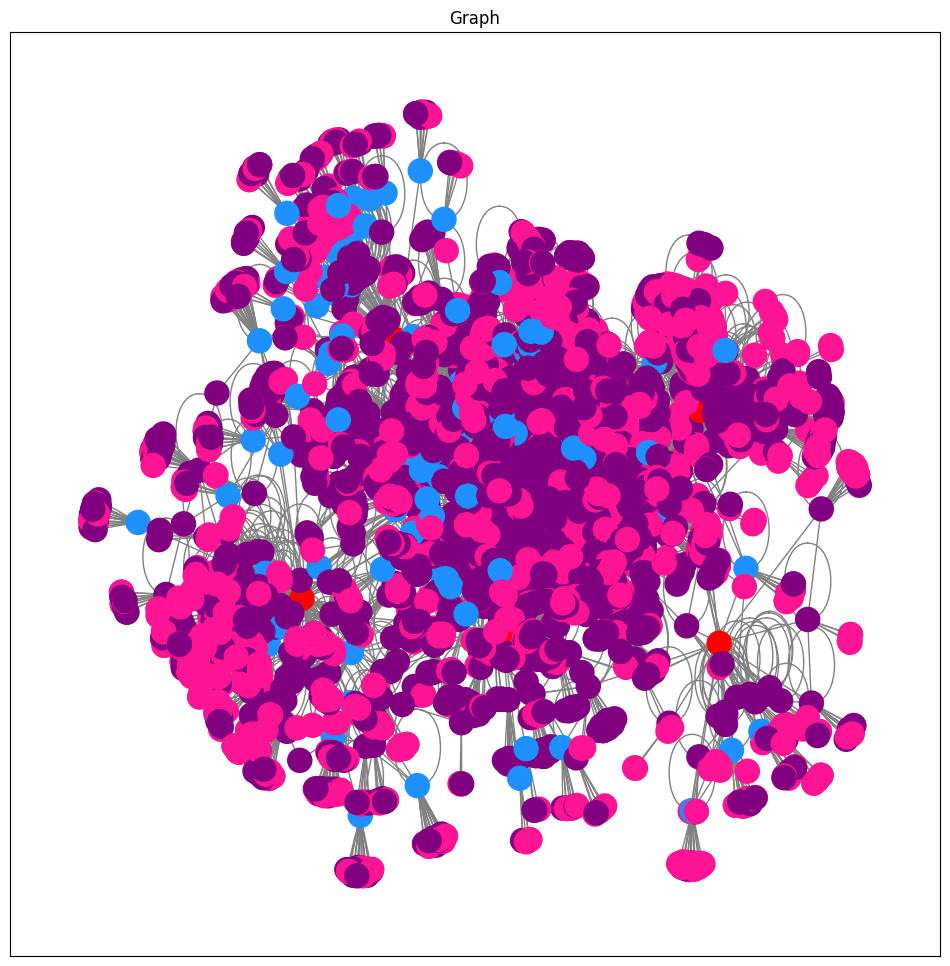

In [14]:
Graph_hs23 = nx.Graph()
Graph_fs23 = nx.Graph()
Graph_hs24 = nx.Graph()
Graph_fs24 = nx.Graph()
create_graph(Graph_hs23, df_hs23)


Number of red nodes (Faculty): 10
Number of nodes: 3152
Number of edges: 4513


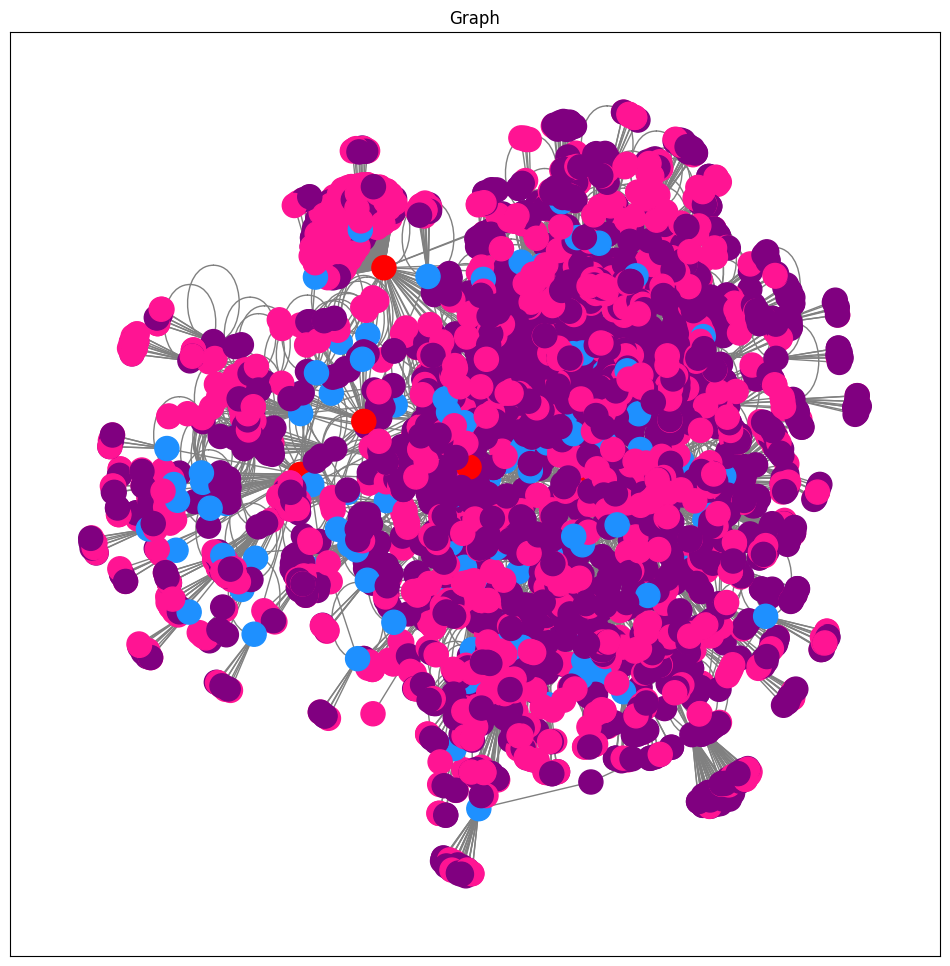

In [15]:
create_graph(Graph_hs24, df_hs24)

Number of red nodes (Faculty): 9
Number of nodes: 3031
Number of edges: 4388


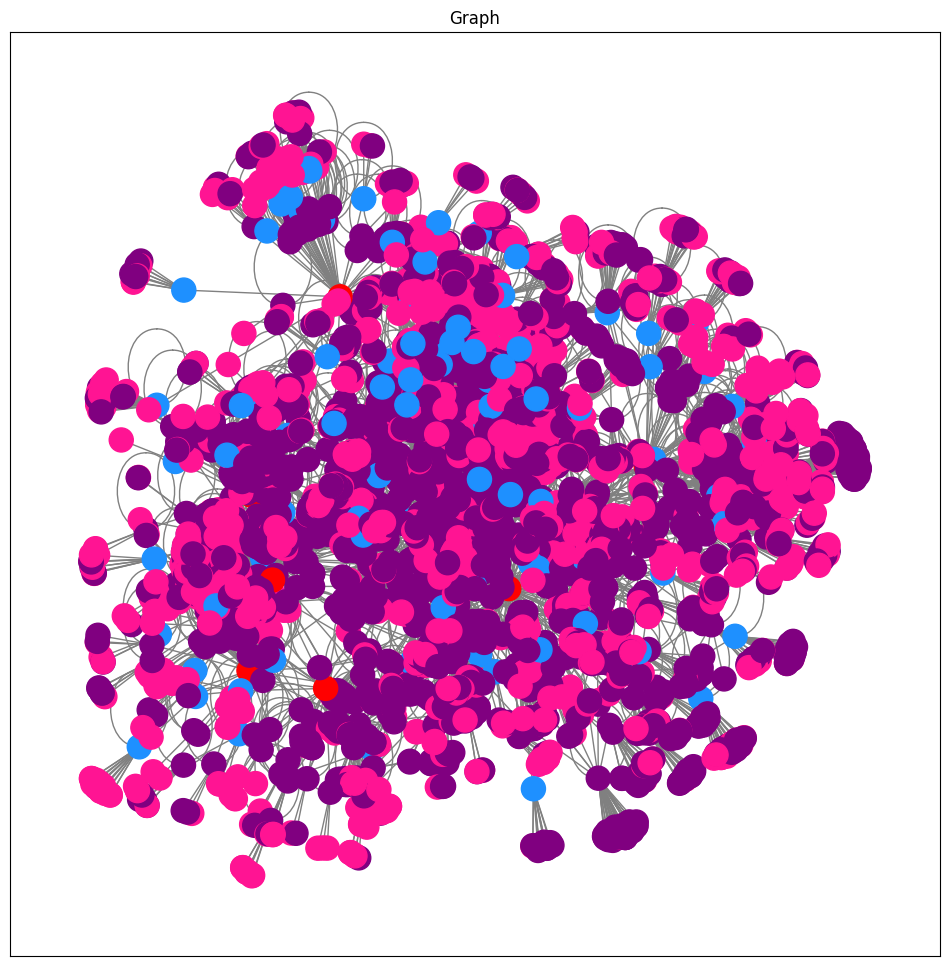

In [16]:
create_graph(Graph_fs23, df_fs23)

Number of red nodes (Faculty): 9
Number of nodes: 2917
Number of edges: 4261


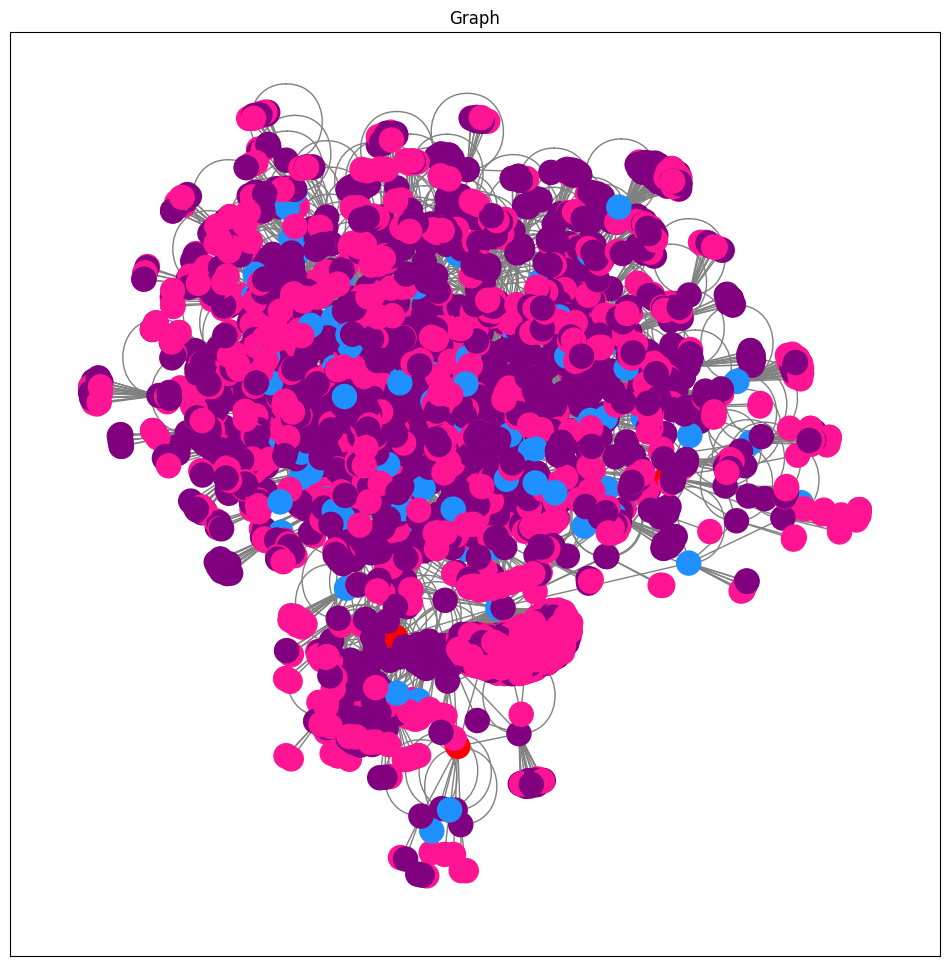

In [17]:
create_graph(Graph_fs24, df_fs24)

In [18]:
def extract_faculty_info_with_instructors(graph, label):
    faculty_info = {}

    # Process the graph to compute counts
    for node, data in graph.nodes(data=True):
        if data.get("type") == "Faculty":
            # Find all responsible instructors connected to this faculty
            responsible_instructors = [
                neighbor for neighbor in graph.neighbors(node)
                if graph.nodes[neighbor].get("type") == "Responsible Instructor"
            ]

            # Count the instructors connected to all responsible instructors
            total_instructors = set()  # Use a set to avoid duplicates
            for responsible_instructor in responsible_instructors:
                instructors = [
                    neighbor for neighbor in graph.neighbors(responsible_instructor)
                    if graph.nodes[neighbor].get("type") == "Instructor"
                ]
                total_instructors.update(instructors)

            # Store the total counts for the faculty
            faculty_info[node] = {
                "Responsible Instructors": len(responsible_instructors),
                "Total Instructors": len(total_instructors),
            }

    # Print results for the graph
    print(f"Results for {label}:\n")
    for faculty, counts in faculty_info.items():
        print(f"Faculty {faculty}: Total Responsible Instructors: {counts['Responsible Instructors']}, "
              f"Total Instructors: {counts['Total Instructors']}")
    print("\n")

Results for HS23:

Faculty MNF: Total Instructors: 196
Faculty MEF: Total Instructors: 208
Faculty Language Courses: Total Instructors: 136
Faculty VSF: Total Instructors: 138
Faculty PHF: Total Instructors: 202
Faculty WWF: Total Instructors: 130
Faculty RWF: Total Instructors: 152
Faculty THF: Total Instructors: 151
Faculty Transdisciplinary Studies: Total Instructors: 33


Results for FS23:

Faculty MNF: Total Instructors: 270
Faculty MEF: Total Instructors: 370
Faculty Language Courses: Total Instructors: 221
Faculty VSF: Total Instructors: 247
Faculty WWF: Total Instructors: 99
Faculty PHF: Total Instructors: 264
Faculty RWF: Total Instructors: 222
Faculty Transdisciplinary Studies: Total Instructors: 31
Faculty THF: Total Instructors: 226


Results for HS24:

Faculty MNF: Total Instructors: 70
Faculty VSF: Total Instructors: 11
Faculty nan: Total Instructors: 18
Faculty MEF: Total Instructors: 78
Faculty Language Courses: Total Instructors: 0
Faculty PHF: Total Instructors: 62
Fa

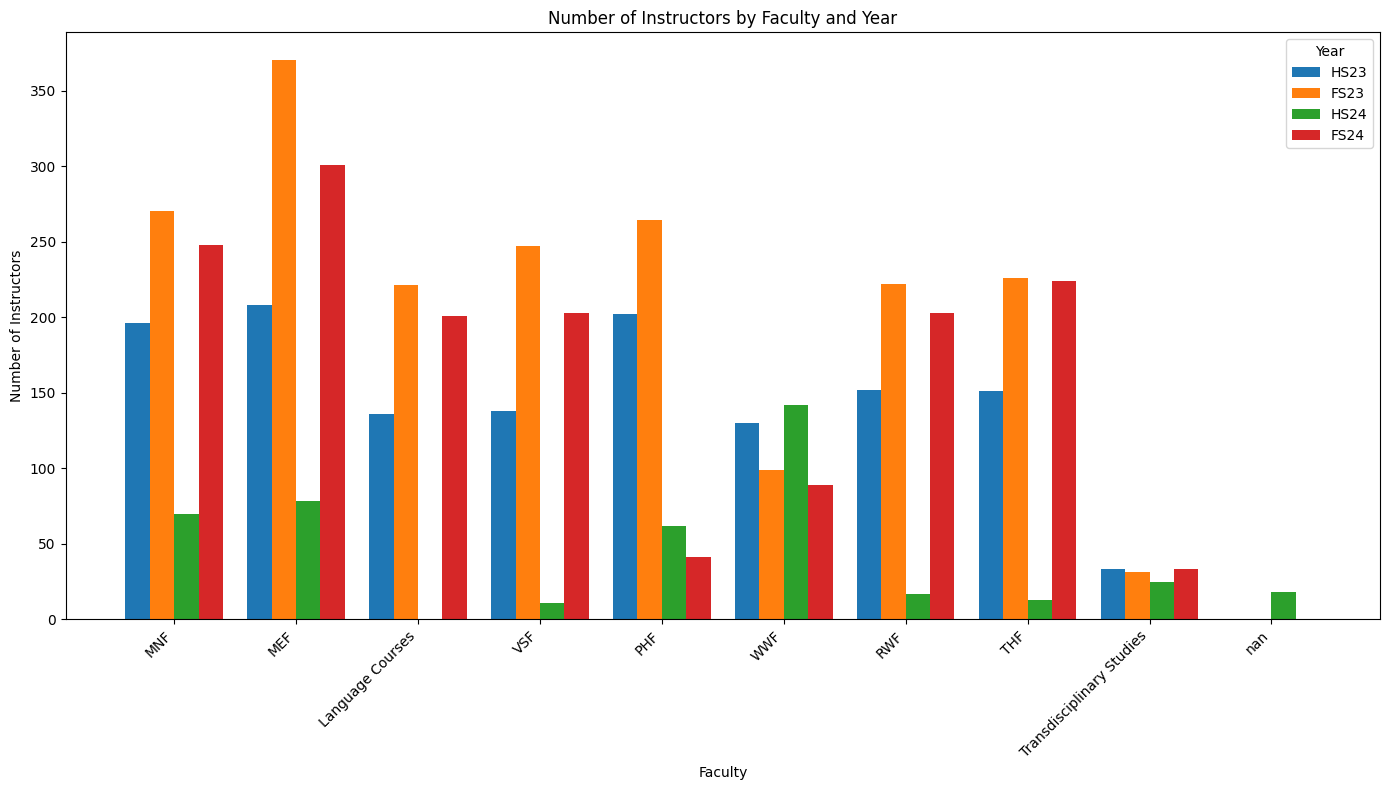

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to extract faculty info and create data for the bar graph
def extract_faculty_info_with_instructors2(graph, label, results):
    faculty_info = {}

    # Process the graph to compute counts
    for node, data in graph.nodes(data=True):
        if data.get("type") == "Faculty":
            # Find all responsible instructors connected to this faculty
            responsible_instructors = [
                neighbor for neighbor in graph.neighbors(node)
                if graph.nodes[neighbor].get("type") == "Responsible Instructor"
            ]

            # Count the instructors connected to all responsible instructors
            total_instructors = set()  # Use a set to avoid duplicates
            for responsible_instructor in responsible_instructors:
                instructors = [
                    neighbor for neighbor in graph.neighbors(responsible_instructor)
                    if graph.nodes[neighbor].get("type") == "Instructor"
                ]
                total_instructors.update(instructors)

            # Store the total counts for the faculty
            faculty_info[node] = len(total_instructors)  # Store only the total instructors

    # Add results to the dictionary for plotting
    results[label] = faculty_info

    # Print results for the graph
    print(f"Results for {label}:\n")
    for faculty, total_instructors in faculty_info.items():
        print(f"Faculty {faculty}: Total Instructors: {total_instructors}")
    print("\n")

# Example usage with multiple graphs
results = {}
graphs = {"HS23": Graph_hs23, "FS23": Graph_fs23, "HS24": Graph_hs24, "FS24": Graph_fs24}

for label, graph in graphs.items():
    extract_faculty_info_with_instructors2(graph, label, results)

# Prepare data for plotting
df = pd.DataFrame(results).fillna(0)

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
positions = range(len(df.index))

# Plot bars for each year
for i, year in enumerate(df.columns):
    ax.bar(
        [p + bar_width * i for p in positions],
        df[year],
        bar_width,
        label=year
    )

# Adding labels and titles
ax.set_xticks([p + bar_width * (len(df.columns) - 1) / 2 for p in positions])
ax.set_xticklabels(df.index, rotation=45, ha="right")
ax.set_ylabel("Number of Instructors")
ax.set_xlabel("Faculty")
ax.set_title("Number of Instructors by Faculty and Year")
ax.legend(title="Year")

# Display the graph
plt.tight_layout()
plt.show()